# Association Rule Mining

In [1]:
import pandas as pd
import itertools
import math
import timeit
import numpy as np
import matplotlib.pyplot as plt

## Step 0
- You will get two tsv files from us. Rows are transactions with purchased items. Load it in your language/environment.
- Use the smaller file (items.tsv, minsupp of 70%) for development and the larger file (retail.tsv, minsupp of 10%) for evaluation.

In [2]:
import csv

with open('items.tsv', 'r') as f:
    reader = csv.reader(f, delimiter=" ")
    dataset_1 = [[int(item) for item in purchase if item] for purchase in reader]
    
with open('retail.tsv', 'r') as f:
    reader = csv.reader(f, delimiter=" ")
    dataset_2 = [[int(item) for item in purchase if item] for purchase in reader]

[[4, 6, 7, 8, 16, 17, 18, 19, 20, 21, 22, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 43, 44, 45, 47, 48], [4, 6, 7, 8, 12, 16, 18, 19, 20, 21, 22, 24, 30, 32, 34, 35, 41, 47, 49, 50, 53], [6, 8, 11, 12, 19, 20, 21, 22, 27, 29, 30, 32, 33, 34, 37, 40, 41, 42, 46, 50, 53], [4, 6, 8, 9, 20, 21, 22, 24, 29, 30, 33, 34, 43, 45, 47, 51, 53], [2, 4, 6, 15, 21, 22, 24, 29, 30, 31, 34, 37, 40, 41, 44, 51, 52, 53], [1, 6, 13, 22, 24, 27, 29, 32, 34, 37, 41, 43, 45, 53], [4, 5, 6, 13, 20, 22, 23, 24, 27, 30, 31, 34, 37, 42, 46, 48, 51], [1, 6, 14, 15, 22, 24, 25, 27, 28, 29, 30, 33, 35, 36, 37, 41, 43, 47, 51], [3, 4, 5, 6, 11, 21, 22, 23, 24, 25, 26, 27, 28, 29, 34, 40, 43, 44, 45, 48, 50, 51], [6, 10, 14, 15, 18, 20, 21, 26, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38, 39, 41, 43, 49, 50, 53]]


## Step 1
- Implement the Apriori algorithm*.

In [3]:
def apriori(dataset, minsupp, verbose=False):
    total_transactions = len(dataset)
    candidates = sorted({(item,) for transaction in dataset for item in transaction})
    k = 1
    debug_threshold = math.ceil(total_transactions/100)

    result = []
    while candidates:
        candidate_counts = dict()
        if verbose:
            print(f'k={k}')
        for i, transaction in enumerate(dataset):
            if verbose and i % debug_threshold == 0:
                print(f'{i}/{total_transactions}', end='\r')
            for c_t in itertools.combinations(transaction, r=k):
                if k == 1 or c_t in candidates:
                    if c_t not in candidate_counts:
                        candidate_counts[c_t] = 0
                    candidate_counts[c_t] += 1
        if verbose:     
            print(f'{total_transactions}/{total_transactions}')
        
        frequent_items = set()
        for item, count in sorted(candidate_counts.items()):
            if count / total_transactions >= minsupp:
                frequent_items.add(item)
        
        if verbose:
            print(f'Frequent items fount: {len(frequent_items)}')

        for items in sorted(frequent_items):
            result.append(items)

        relevant_items = sorted({item for items in frequent_items for item in items})
        k += 1
        candidates = list(itertools.combinations(relevant_items, r=k))
    
    return result

- Using your implementation, extract frequent item sets from the given datasets.

In [4]:
print(apriori(dataset_1, 0.7, verbose=True))

k=1
10/10
Frequent items fount: 8
k=2
10/10
Frequent items fount: 12
k=3
10/10
Frequent items fount: 5
k=4
10/10
Frequent items fount: 0
[(6,), (21,), (22,), (24,), (30,), (34,), (37,), (41,), (6, 21), (6, 22), (6, 24), (6, 30), (6, 34), (6, 37), (6, 41), (21, 34), (22, 24), (22, 30), (22, 34), (30, 34), (6, 21, 34), (6, 22, 24), (6, 22, 30), (6, 22, 34), (6, 30, 34)]


In [5]:
print(apriori(dataset_2, 0.1, verbose=True))

k=1
88162/88162
Frequent items fount: 5
k=2
88162/88162
Frequent items fount: 4
k=3
88162/88162
Frequent items fount: 0
[(32,), (38,), (39,), (41,), (48,), (38, 39), (39, 41), (39, 48), (41, 48)]


## Step 2
- Implement the ECLAT algorithm*.
- Using your implementation, extract frequent item sets from the given datasets.

In [6]:

def eclat(dataset, minsupp, verbose=False):
    total_transactions = len(dataset)

    k=1
    item_transactions = dict()
    for index, transaction in enumerate(dataset):
        for item in transaction:
            if (item,) not in item_transactions:
                item_transactions[item,] = set()
            item_transactions[item,].add(index)
    result = []
    while item_transactions:
        k +=1
        if verbose:
            print(f'k={k}')
        frequent_items = set()
        for item, transaction_indices in  item_transactions.items():
            if len(transaction_indices) / total_transactions >= minsupp:
                frequent_items.add(item)
        if verbose:
            print(f'Frequent items fount: {len(frequent_items)}')
        result.extend(sorted(frequent_items))

        relevant_items = sorted({item for items in frequent_items for item in items})

        candidates = list(itertools.combinations(relevant_items, r=k))
        new_item_transactions = dict()
        for candidate in candidates:
            old_candidates = list(itertools.combinations(candidate, r=k-1))
            new_item_transactions[candidate] = item_transactions[old_candidates[0]].intersection(*(item_transactions[i] for i in old_candidates[1:]))
        item_transactions = new_item_transactions
    return result
    

In [7]:
print(eclat(dataset_1, 0.7, verbose=True))

k=2
Frequent items fount: 8
k=3
Frequent items fount: 12
k=4
Frequent items fount: 5
k=5
Frequent items fount: 0
[(6,), (21,), (22,), (24,), (30,), (34,), (37,), (41,), (6, 21), (6, 22), (6, 24), (6, 30), (6, 34), (6, 37), (6, 41), (21, 34), (22, 24), (22, 30), (22, 34), (30, 34), (6, 21, 34), (6, 22, 24), (6, 22, 30), (6, 22, 34), (6, 30, 34)]


In [8]:
print(eclat(dataset_2, 0.1, verbose=True))

k=2
Frequent items fount: 5
k=3
Frequent items fount: 4
k=4
Frequent items fount: 0
[(32,), (38,), (39,), (41,), (48,), (38, 39), (39, 41), (39, 48), (41, 48)]


## Step 3
- Compare the runtimes of both algorithms on both files.

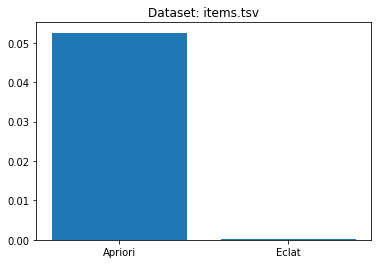

In [9]:
count = 100
t_1 = timeit.timeit(lambda: apriori(dataset_1, 0.7), number=count) / count
t_2 = timeit.timeit(lambda: eclat(dataset_1, 0.7), number=count) / count
y_pos = np.arange(2)
plt.bar(y_pos, (t_1, t_2))
plt.xticks(y_pos, ("Apriori", "Eclat"))
plt.title(f'Dataset: items.tsv')
plt.show()

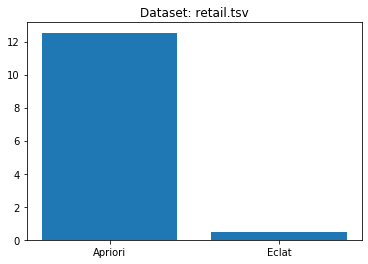

In [10]:
count = 10
t_1 = timeit.timeit(lambda: apriori(dataset_2, 0.1), number=count) / count
t_2 = timeit.timeit(lambda: eclat(dataset_2, 0.1), number=count) / count
y_pos = np.arange(2)
plt.bar(y_pos, (t_1, t_2))
plt.xticks(y_pos, ("Apriori", "Eclat"))
plt.title(f'Dataset: retail.tsv')
plt.show()